## Group Project (#15)
#### Members: 
- Bhoomika Yadav
- Yubin Kim
- Karen Rianika Tanuwijaya
- Yasin Mir 

## Introduction 



A predictive question is where a certain class or a specific numerical value of a future observation is estimated using data that already exists. To predict the usage of a video game server, specifically to predict a player’s hours playing the game, we are going to use a method called regression using the k-nearest neighbors model. Regression is a method used to predict a quantitative value for our future observations. Since we are using the k-nearest neighbors model, we take the average number of neighbors close to each value of the predictor and make a curve that fits the total observations. This curve contains the average location of all the points close to the predictor value thus we can predict the numerical value of our future observation. 


#### Question 
The question we chose to answer is: Which kinds of players are most likely to contribute a large amount of data so that so that we can target those players in our recruiting efforts. 
The specific question we are trying to explore and answer is: Can the `experience` of the players be used to predict the total play time `played_hours` of the player in the players dataset? 

### Data Description of the players.csv dataset 
To address this question, the players.csv dataset was used. This dataset was selected as it contains the necessay information required to answer the question, that is it provides data on each player's experience level and the total number of hours they have spent playing the game, both of which are essential to make a prediction on our question. 

##### Overview of the variables 
|Name        |Type                |Description| 
|:--------   |:---------          |:----------|
|`experience`  |Character (Categorical)| Player's skill level (Amateur, Beginner, Regular, Veteran and Pro)|         
|`subscribe`   |Logical (a boolean)| Whether or not the player has a subscription| 
|`hashedEmail` |Character| Unique identifier for each player |
|`played_hours`|Double| Total hours spent on the server by player |
|`name`        |Character| Player's name |
|`gender`     |Character (Categorical)|  Player's gender (7 categories)|
|`Age`         |Double| Player's age (8 - 50 years)|

# 
- Most players are `Amateur`
- Most players have the subscription for the game
- Most player are `Male`
- Average play time: around 5.85hrs.
- Average age: 20-21 years old. 

### Analysis 

The necessary libraries are loaded and the players.csv dataset was imported using a reproducible method that accesses the raw data through a direct link.

In [26]:
#Loading the libraries needed
library(tidyverse) 
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
#library(ggtext)

In [27]:
#Loading the players.csv data
players_data <- read_csv("https://raw.githubusercontent.com/bhxxmika/group_project_files/refs/heads/main/players.csv") 
players_data|>
head()

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


### Figure 1: Analysing the relationship between `experience` and `played_hours` 


To determine whether player experience level is a meaningful predictor of playtime and to identify trends within the dataset, a bar graph of average hours played by experience level is generated. Appropriate graph dimensions are set, and rows where `played_hours` = 0 are removed, as they represent players who did not engage with the game and could skew the analysis. The data is grouped by experience level, and the mean of `played_hours` is calculated for each group. This information is then visualized using a bar chart, with experience level on the x-axis and average hours played on the y-axis, to highlight potential relationships between skill level and playtime.

experience,played_hours_mean
<chr>,<dbl>
Amateur,10.831429
Beginner,2.300000
Pro,3.309091
Regular,32.775000
Veteran,1.196154


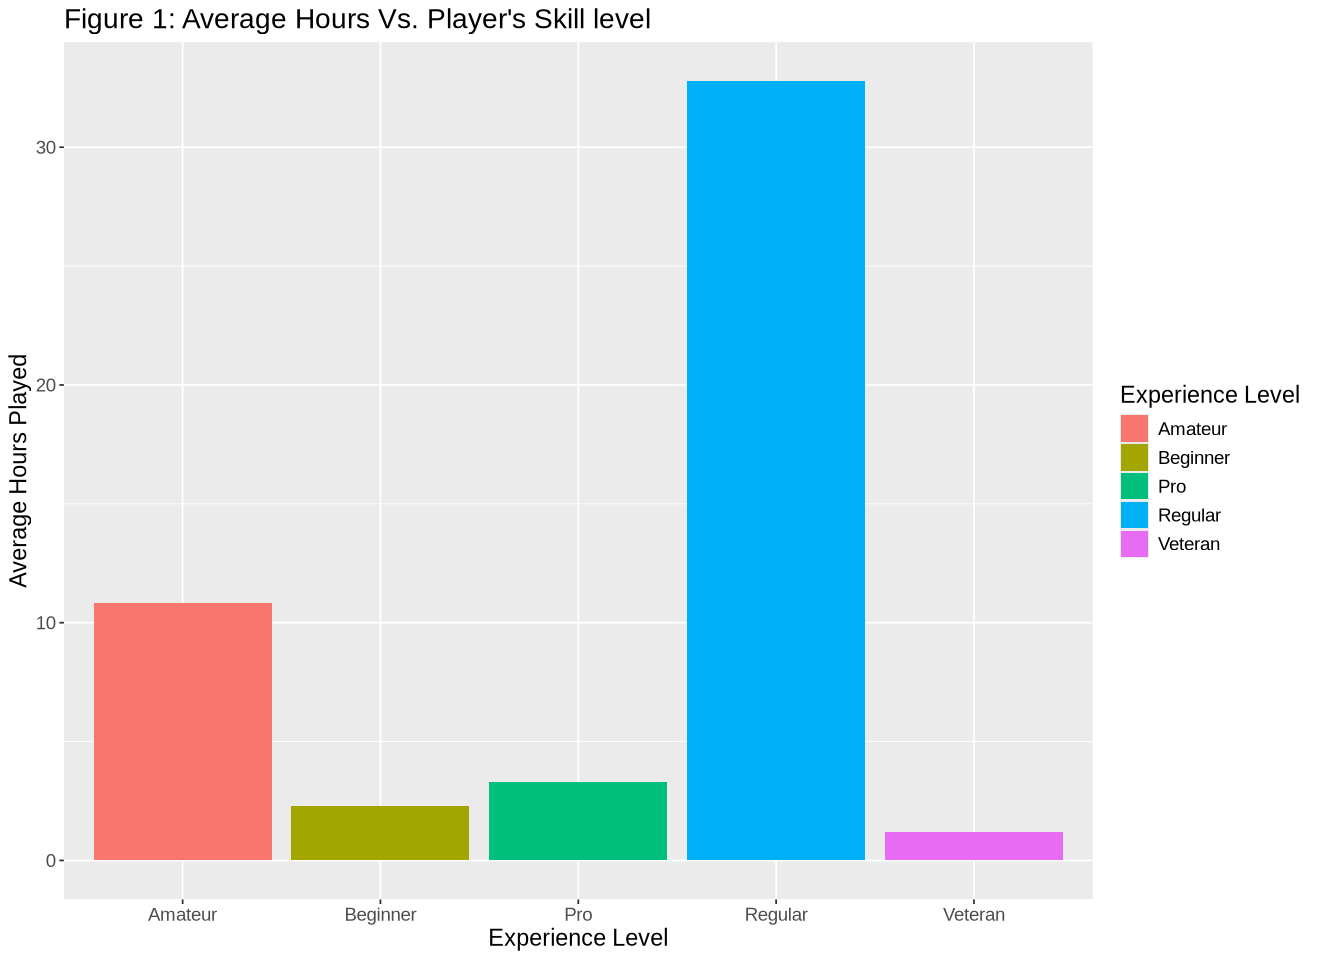

In [29]:

#setting the height and width for the graph 
options(repr.plot.width = 11, repr.plot.height = 8)

#grouping the dataset by experience 
players_by_lvlavg <- players_data |> 
                filter(played_hours > 0) |>
                group_by(experience) |>
                summarize(played_hours_mean = mean(played_hours)) 
players_by_lvlavg 


# Plotting the relationhip between `experience` and `played_hours`
experience_vs_hours <- players_by_lvl |> 
                    ggplot(aes(x = experience, y = played_hours_mean, fill = experience)) + 
                    geom_bar(stat = "identity") + 
                    labs(x = "Experience Level", y = "Average Hours Played", title = "Figure 1: Average Hours Vs. Player's Skill level", fill = "Experience Level") + 
                    theme(text = element_text(size = 14))
                    
experience_vs_hours 


The **Figure 1** bar plot shows that players classified as `Regular` have the highest average playtime by a significant margin relative to `Amateur`,`Beginner`,`pro`, and `Veteran` players. But does it really mean that most of the players with regular skill level play for more hours compared to other levels of players? Let's explore the range of hours played by each `experience` using a scatterplot

min_hours,max_hours
<dbl>,<dbl>
0.1,223.1


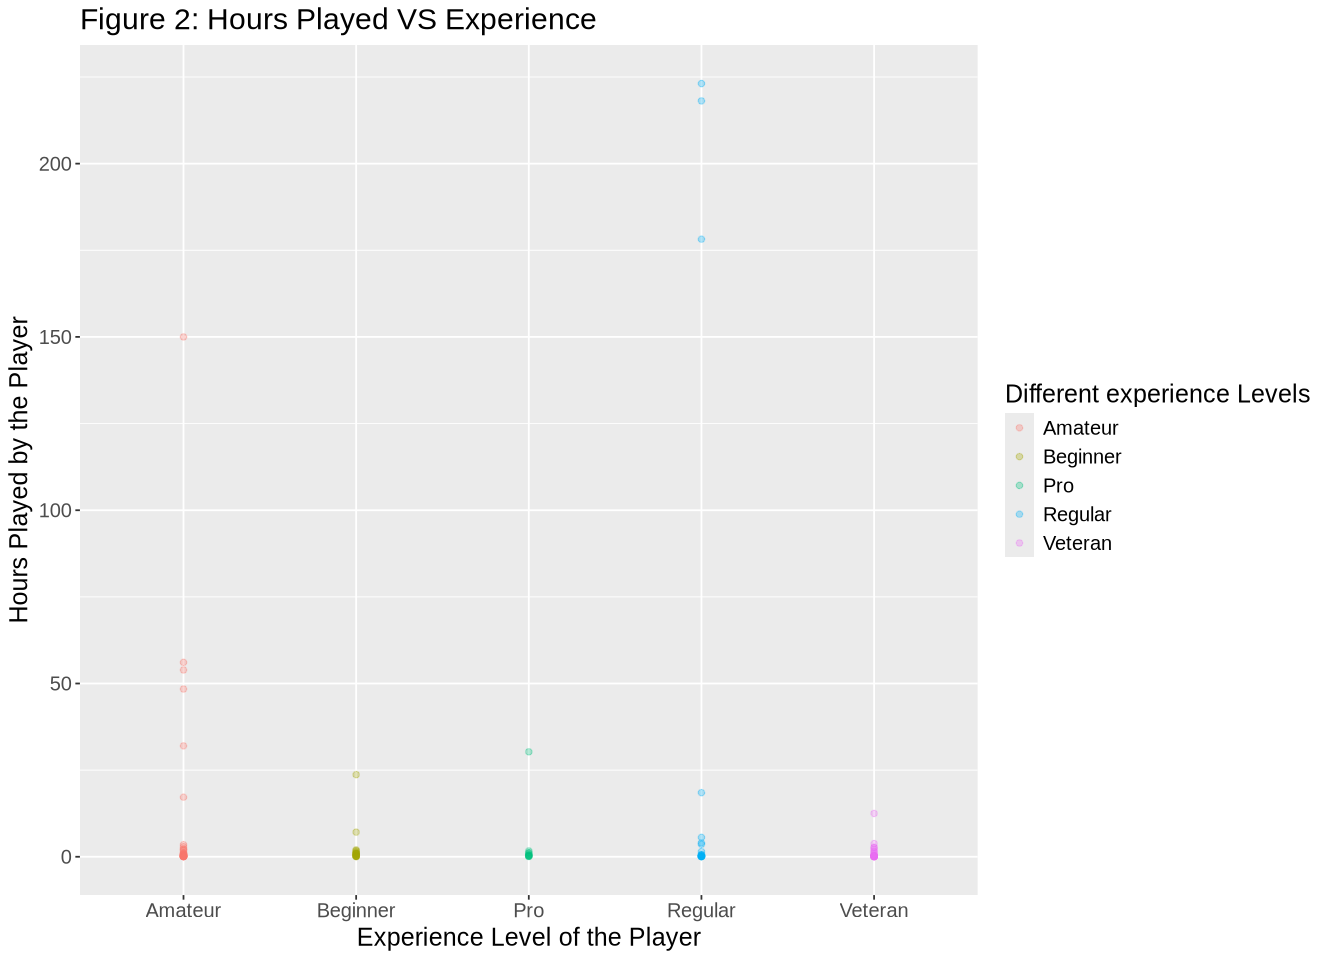

In [37]:
# Visualizing the range hours player's play VS their experience level using a scatterplot

hours_vs_experience <- players_data |> 
                    filter(played_hours > 0) |>
                    ggplot(aes(x = experience, y = played_hours, color = experience)) + 
                    geom_point(alpha = 0.3) +
                    labs(x = "Experience Level of the Player", y = "Hours Played by the Player", 
                         color = "Different experience Levels", title = "Figure 2: Hours Played VS Experience") + 
                    theme(text = element_text(size = 15)) 
hours_vs_experience

#Finding the minimum and maximum hours 
hours_range <- players_data |> 
        filter(played_hours > 0) |>
        summarize(min_hours = min(played_hours), max_hours = max(played_hours)) 
hours_range

The significantly higher average hours for `Regular` experience level can be explained by a few players who have logged substantially more hours than the rest. While the range of `played_hours` extends up to approx. 223 hours, only a small number of players fall into this extreme, making them outliers. These outliers skew the overall average, affecting our interpretation of the data. The majority of players accross all experiences levels have relatively low playtime, as evident from their clustering near the bottom of the graph. 

Next, the dataset is wrangled to prepare for modelling. The relevant columns `experience` and `played_hours` are first selected. Like before, rows with `played_hours`= 0 are removed to ensure only active players are included in the analysis. The experience variable is then recoded into numeric values to be compatible with the k-nearest neighbors algorithm, which uses on numerical distance calculations. Then the dataset is split into training and testing sets using a 75/25 ratio.

In [38]:
# Wrangling the data 

players_tidy <- players_data |>  
                select(experience, played_hours) |> 
                filter(played_hours > 0) |>
                mutate(experience = fct_recode(experience, "1" = "Amateur", "2" = "Beginner", "3" = "Regular", "4" = "Veteran", "5" = "Pro")) |> 
                mutate(experience = as.numeric(experience)) 
            
head(players_tidy) 
tail(players_tidy)

#set seed for reproducibility
set.seed(2000)
players_split <- players_tidy |> 
                    initial_split(prop = 0.75, strata = played_hours) 
players_training <- training(players_split) 
players_testing <- testing(players_split) 
head(players_training) 
head(players_testing) 


experience,played_hours
<dbl>,<dbl>
3,30.3
5,3.8
1,0.7
4,0.1
1,0.1
5,1.6


experience,played_hours
<dbl>,<dbl>
3,1.7
4,0.1
5,0.1
5,0.3
1,2.3
3,0.2


experience,played_hours
<dbl>,<dbl>
4,0.1
1,0.1
1,0.2
4,0.3
1,0.1
5,0.1


experience,played_hours
<dbl>,<dbl>
3,30.3
1,0.5
1,0.1
2,0.6
5,1.4
5,0.1


Now the wrangled data can be used for knn regression.
Firstly, A k-nearest neighbors regression model `knn_spec` is specified using the kknn engine and a recipe `knn_recipe` defines the model formula and includes centering and scaling steps.


In [39]:
#set seed for reproducibility
set.seed(2000) 
# Define the k-NN model with tuning enabled for the number of neighbors
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
            set_engine("kknn") |> 
            set_mode("regression") 


# Create a recipe to define the modeling formula and preprocessing steps
knn_recipe <- recipe(played_hours ~ experience, data = players_training) |> 
                step_scale(all_predictors()) |> 
                step_center(all_predictors()) 
knn_spec
knn_recipe

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Next, 5-fold cross-validation is used to evaluate model performance across a range of k values. A workflow is created to bundle together the recipe and model specification.

In [40]:
#set seed for reproducibility
set.seed(2000) 

# Create 5-fold cross-validation splits
knn_vfold <- vfold_cv(players_training, v = 5, strata = played_hours) 

# Create workflow that combines the recipe and model together
knn_workflow <- workflow() |> 
             add_recipe(knn_recipe) |> 
             add_model(knn_spec) 

The number of neighbors (k) is tuned from 1 to 50 using cross-validation. The value of k that minimizes the root mean squared error (RMSE) is selected to be used for the final model. To visualize how RMSE changes with k values near the selected k, a line plot is created showing the average RMSE for each k. This plot helps confirm the validity of the chosen k.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,31.26917,5,12.265,Preprocessor1_Model07


[1] 7

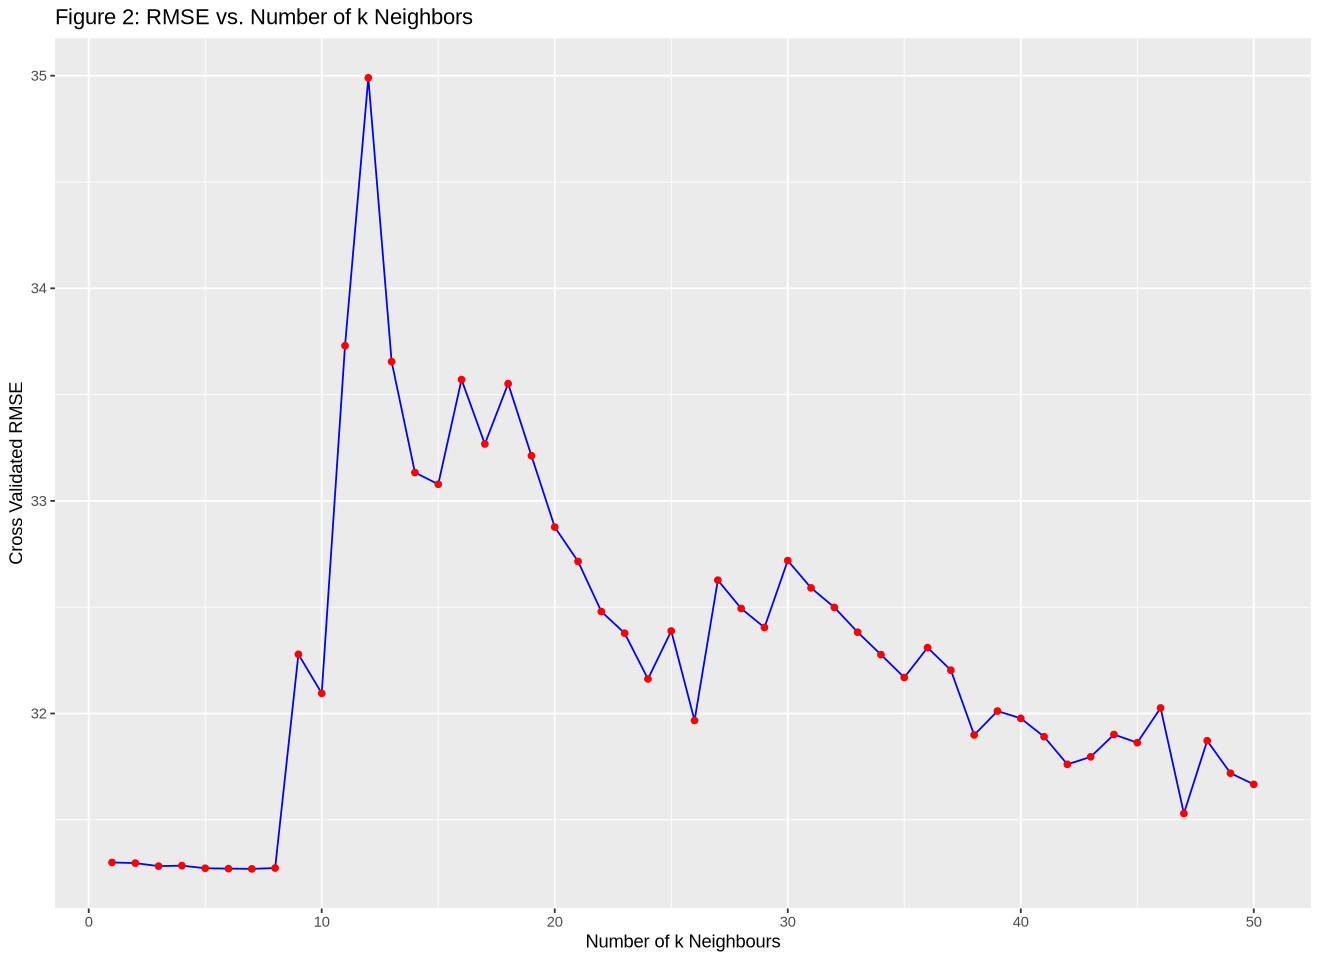

In [41]:
#set seed for reproducibility
set.seed(2000) 

# Define a grid of k values to try
k_values <- tibble(neighbors = seq(from = 1, to = 50, by = 1)) 


# Perform grid search over k values using cross-validation
knn_results <- knn_workflow |> 
                tune_grid(resamples = knn_vfold, grid = k_values) |> 
                collect_metrics() 

# Identify the k value with the lowest RMSE
knn_min <- knn_results |> 
            filter(.metric == "rmse") |> 
            filter(mean == min(mean)) 
knn_min #FOUND THAT 7 IS THE BEST K VAL 
knn_min_val <- knn_min |> 
                pull(neighbors) 
knn_min_val
#Filter to only include RMSE results and plot RMSE vs. k
rmse_results<-knn_results|>
    filter(.metric=="rmse")
ggplot(rmse_results, aes(x=neighbors, y=mean))+
    geom_line(color="blue")+
    geom_point(color="red")+
    labs(x="Number of k Neighbours", y="Cross Validated RMSE", title="Figure 2: RMSE vs. Number of k Neighbors")


The graph confirms that the value of k that minimizes prediction error is 7 and remains low and stable for small k values but widely fluctuates as k increases. 
#### But we can't really see which one has the lowest RMSE from 1-7 as it all just seems the same (?) ASK TA 

Next, it should be confirmed that the models RMSE is decent (???) relative to the range of player hours. To do this, a histogram visualization showing the range and frequency of actual played hours in the test set is graphed with a reference line to indicate the model's RMSE. This will help assess if the RMSE is large or small relative to the data.

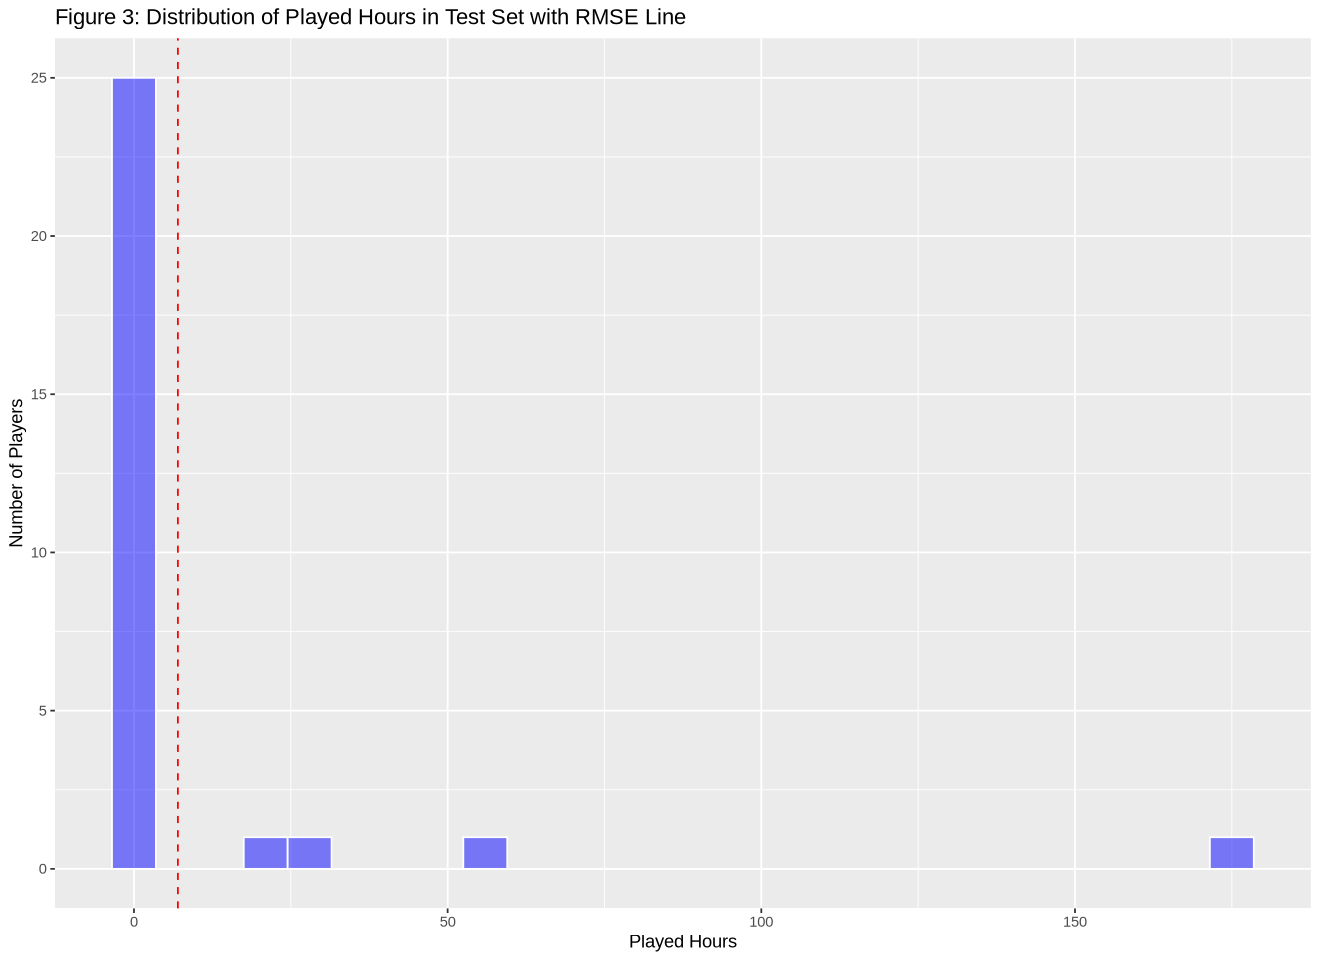

In [42]:

# Plot histogram of actual played_hours in test set
ph_range<-ggplot(players_testing, aes(x = played_hours)) +
  geom_histogram(binwidth = 7, fill = "blue", color = "white", alpha = 0.5) +
  geom_vline(xintercept = knn_min_val, linetype = "dashed", color = "red") +
  labs(title = "Figure 3: Distribution of Played Hours in Test Set with RMSE Line",
    x = "Played Hours",
    y = "Number of Players") 
ph_range

The histogram in Figure 3 shows that the majority of players in the test set have very low `played_hours`, with most clustered between 0 and 10 hours. Given that the model’s RMSE is approximately 35 hours, the prediction error exceeds the actual playtime of most users. This indicates that the model may not be accurate with the current predictors.

Finally, The final k-NN model is trained using the best k value identified in the previous step (k=7). Predictions are made on the test set, and performance is evaluated using (ADD WHICH ONES) metrics.

In [43]:
#set seed for reproducibility
set.seed(2000)

# Finalize model with best k value
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = knn_min_val) |> 
                set_engine("kknn") |> 
                set_mode("regression") 

#Fit the finalized workflow to the training data
players_fit <- workflow() |> 
                add_recipe(knn_recipe) |> 
                add_model(players_spec) |> 
                fit(data = players_training) 

# Predict on the testing set and calculate evaluation metrics
knn_almost_rmse <- players_fit |> 
                        predict(players_testing) |>
                        bind_cols(players_testing) |> 
                        metrics(truth = played_hours, estimate = .pred) 
knn_almost_rmse
# Extract RMSE from test set
knn_rmse <- knn_almost_rmse |> 
                filter(.metric == "rmse") |> 
                select(.estimate) |> 
                pull() 
knn_rmse 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,35.353005281
rsq,standard,0.002432698
mae,standard,10.418226601


[1] 35.35301

To evaluate how well the k-NN model predicts playtime across different experience levels, a visualization is created comparing predicted values to the actual group averages. Predicted played_hours values are plotted as individual blue points, while the true average played_hours for each experience level is shown as a red line. This will allow for visual assesment of how closely the model’s predictions align with the real trend in the data to answer the specified question of if the experience of the players can be used to predict the total play time played_hours of the player in the players dataset.

experience,played_hours,.pred
<fct>,<dbl>,<dbl>
3,30.3,0.8000000
1,0.5,0.1428571
1,0.1,0.1428571
2,0.6,0.5000000
5,1.4,0.1571429
5,0.1,0.1571429
1,0.3,0.1428571
3,0.2,0.8000000
1,0.1,0.1428571


experience,played_hours,.pred
<fct>,<dbl>,<dbl>
3,30.3,0.8000000
1,0.5,0.1428571
1,0.1,0.1428571
2,0.6,0.5000000
5,1.4,0.1571429
5,0.1,0.1571429


experience,actual_mean
<dbl>,<dbl>
1,5.554545
2,4.600000
3,7.700000
4,178.200000
5,1.157143


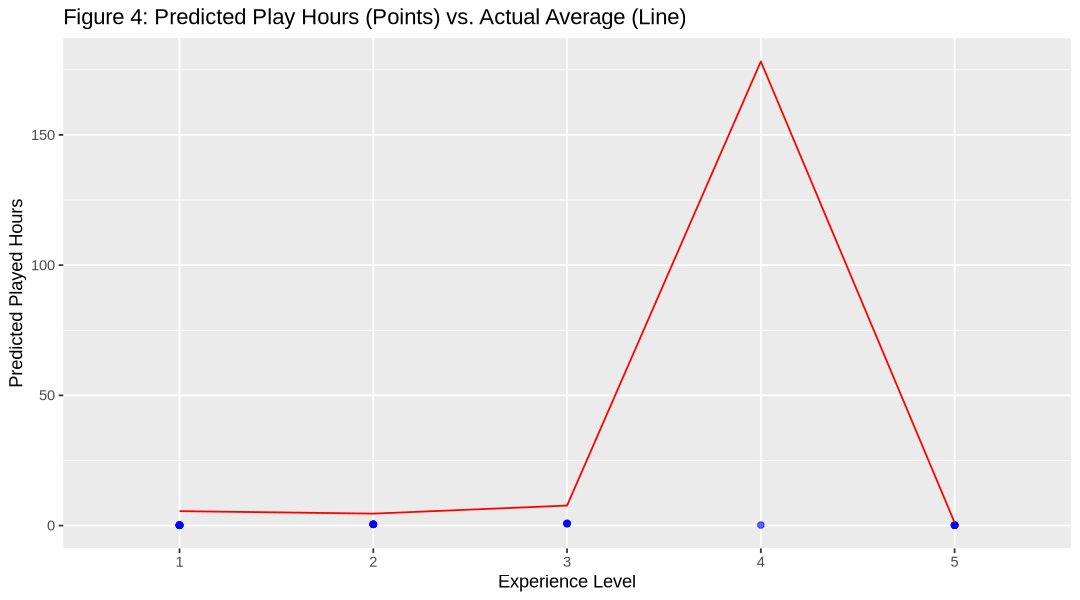

In [44]:
# Generate predictions on the testing set
options(repr.plot.width = 9, repr.plot.height = 5)
predictions <- players_testing |> 
  bind_cols(predict(players_fit, players_testing))|>
 mutate(experience = factor(experience))

predictions

# Calculate actual average played_hours per experience level
actual_means <- players_testing |> 
  group_by(experience) |> 
  summarise(actual_mean = mean(played_hours))

# Create plot
Figure_4<-ggplot(predictions, aes(x = experience, y = .pred)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_line(data = actual_means, aes(x = experience, y = actual_mean), 
            color = "red") +
  labs(title = "Figure 4: Predicted Play Hours (Points) vs. Actual Average (Line)",
    x = "Experience Level",
    y = "Predicted Played Hours")
Figure_4

head(predictions) 

actual_means 